In [1]:
import csv
import pandas as pd

Value in column funds are written as dollar currency. However this data will use for machine learning model for scholarship in Indonesia then we should convert it to Rupiah by multiply it to the latest currency.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Namirachmi/capstone2023/machine-learning/Scholarship_dataset.csv')
df.head()

,scholarship_program_name,promoter,funds,funds_in_rupiah,gpa,religion,major_study,gpa_status,identity,underrepresented_minority,...,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,500,6500000,0.0,Publik,Any,False,Semua,False,...,True,False,True,False,False,False,False,False,False,SMA
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,500,6500000,0.0,Publik,Any,False,Semua,False,...,True,True,False,False,False,False,False,False,False,SMP-SMA
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,1000,13000000,0.0,Publik,Any,False,Semua,False,...,True,False,False,True,False,False,False,False,False,Sarjana
3,Nitro No-Essay Scholarship,Nitro College,2000,26000000,0.0,Publik,Any,False,Semua,False,...,False,False,False,False,False,False,False,False,True,SMP-SMA-Sarjana-Fresh Graduate
4,Niche No-Essay Scholarship,Niche,2000,26000000,0.0,Publik,Any,False,Semua,False,...,False,False,False,False,False,False,False,False,True,SMP-SMA-Sarjana-Fresh Graduate


In [3]:
print(f"The Dataset have {df.shape[0]} row and {df.shape[1]} column")
df.dtypes

The Dataset have 506 row and 26 column


scholarship_program_name           object
promoter                           object
funds                               int64
funds_in_rupiah                     int64
gpa                               float64
religion                           object
major_study                        object
gpa_status                           bool
identity                           object
underrepresented_minority            bool
volunteering                         bool
first_generation                     bool
parental_status                    object
low_income                           bool
background                         object
total_awardee                       int64
essay                                bool
SMP-SMA                              bool
SMA                                  bool
Sarjana                              bool
SMP-SMA-Sarjana                      bool
SMA-Sarjana                          bool
Sarjana-Fresh Graduate               bool
Fresh Graduate                    

## Step 1 : Let's checking the data types for every column.

There are six column with boolean value : underrepresented_minority, volunteering, first_generation, low_income, and essay.
If we look closely there is one column with false data types. It was the funds column supposed to be float insetad of integer.

So let's fix it!

In [4]:
#fixing funds column
df['funds'] = df['funds'].astype('float64')
df['funds_in_rupiah'] = df['funds_in_rupiah'].astype('float64')
df.head()

,scholarship_program_name,promoter,funds,funds_in_rupiah,gpa,religion,major_study,gpa_status,identity,underrepresented_minority,...,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,500.0,6500000.0,0.0,Publik,Any,False,Semua,False,...,True,False,True,False,False,False,False,False,False,SMA
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,500.0,6500000.0,0.0,Publik,Any,False,Semua,False,...,True,True,False,False,False,False,False,False,False,SMP-SMA
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,1000.0,13000000.0,0.0,Publik,Any,False,Semua,False,...,True,False,False,True,False,False,False,False,False,Sarjana
3,Nitro No-Essay Scholarship,Nitro College,2000.0,26000000.0,0.0,Publik,Any,False,Semua,False,...,False,False,False,False,False,False,False,False,True,SMP-SMA-Sarjana-Fresh Graduate
4,Niche No-Essay Scholarship,Niche,2000.0,26000000.0,0.0,Publik,Any,False,Semua,False,...,False,False,False,False,False,False,False,False,True,SMP-SMA-Sarjana-Fresh Graduate


In [5]:
#Now let's check it again if all the column have the right data types
print(df.dtypes)

scholarship_program_name           object
promoter                           object
funds                             float64
funds_in_rupiah                   float64
gpa                               float64
religion                           object
major_study                        object
gpa_status                           bool
identity                           object
underrepresented_minority            bool
volunteering                         bool
first_generation                     bool
parental_status                    object
low_income                           bool
background                         object
total_awardee                       int64
essay                                bool
SMP-SMA                              bool
SMA                                  bool
Sarjana                              bool
SMP-SMA-Sarjana                      bool
SMA-Sarjana                          bool
Sarjana-Fresh Graduate               bool
Fresh Graduate                    

## Step 2 : Let's selecting the column that relatable

Since the data was scraping from Bold which is a scholarship for only USA Citizen. We have to select a column that will be usefull and related with Indonesia.

Column race and region are not related, since the geography is different. Hence let's drop those two column.

Not only that, column major and background is not really necessary so we will drop it.

In [6]:
df.drop(['funds', 'major_study', 'background', 'low_income'], inplace=True, axis=1)

In [7]:
column_name = df.columns.values
print(column_name)

['scholarship_program_name' 'promoter' 'funds_in_rupiah' 'gpa' 'religion'
 'gpa_status' 'identity' 'underrepresented_minority' 'volunteering'
 'first_generation' 'parental_status' 'total_awardee' 'essay' 'SMP-SMA'
 'SMA' 'Sarjana' 'SMP-SMA-Sarjana' 'SMA-Sarjana' 'Sarjana-Fresh Graduate'
 'Fresh Graduate' 'SMP-SMA-Sarjana-Fresh Graduate' 'education_level']


In [8]:
#print(column_name[3:])

for i in column_name[3:] :
    print(f"\n{i} values =")
    print(df[i].unique())


gpa values =
[0.   3.   3.3  2.7  2.8  3.75 2.5  3.5  3.2  2.   3.6  2.9  2.75 3.4 ]

religion values =
['Publik' 'Islam' 'Kristen' 'Katolik']

gpa_status values =
[False  True]

identity values =
['Semua' 'Perempuan' 'LGBTQ+' 'Laki-laki' 'LGBTQIA+']

underrepresented_minority values =
[False  True]

volunteering values =
[False  True]

first_generation values =
[False  True]

parental_status values =
['None' 'Single mother' 'Orangtua wali' 'Keluarga single parent'
 'Keluarga single mother' 'Anak single parent' 'Single parent']

total_awardee values =
[ 1  4  2  5  3  6 12 25 10]

essay values =
[ True False]

SMP-SMA values =
[False  True]

SMA values =
[ True False]

Sarjana values =
[False  True]

SMP-SMA-Sarjana values =
[False  True]

SMA-Sarjana values =
[False  True]

Sarjana-Fresh Graduate values =
[False  True]

Fresh Graduate values =
[False  True]

SMP-SMA-Sarjana-Fresh Graduate values =
[False  True]

education_level values =
['SMA' 'SMP-SMA' 'Sarjana' 'SMP-SMA-Sarjana-Fre

### Let's check if there is a row with null value in it!

In [9]:
df.isnull().sum().sort_values(ascending=False)

scholarship_program_name          0
promoter                          0
SMP-SMA-Sarjana-Fresh Graduate    0
Fresh Graduate                    0
Sarjana-Fresh Graduate            0
SMA-Sarjana                       0
SMP-SMA-Sarjana                   0
Sarjana                           0
SMA                               0
SMP-SMA                           0
essay                             0
total_awardee                     0
parental_status                   0
first_generation                  0
volunteering                      0
underrepresented_minority         0
identity                          0
gpa_status                        0
religion                          0
gpa                               0
funds_in_rupiah                   0
education_level                   0
dtype: int64

## Step 3 : Let's checking values that still relateable

In column identity which listing a value about gender that can applying the scholarship. You may look that there are value LGBTQ+ and LGBTQIA+. Unfortunately, in Indonesia only two gender acknowleged, female and male. Hence, we have to drop columns with LGBTQ+ and LGBTQIA+ values on identity column.

In [10]:
identity_filter = df[ (df['identity'] == 'LGBTQ+') | (df['identity'] == 'LGBTQIA+')].index

df.drop(identity_filter, inplace=True)

#Checking the total row after filtering
print(f"After filtering, the dataframe has {df.shape[0]} row in total")

After filtering, the dataframe has 496 row in total


## Step 4 : Let's convert some columns from categorical into numerical data (Ordinal Encoding)

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [12]:
#selecting the column
col_encd = (df.iloc[:, 4:]).columns.values

#create a list to save the selecting column name
arr_enc = []

for i in col_encd :
  arr_enc.append(i)

#Transforming into oridnal
col_ord_enc = df[arr_enc].apply(LabelEncoder().fit_transform)
col_ord_enc.head()

,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,parental_status,total_awardee,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,3,0,2,0,0,0,3,0,1,0,1,0,0,0,0,0,0,1
1,3,0,2,0,0,0,3,0,1,1,0,0,0,0,0,0,0,3
2,3,0,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,6
3,3,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,5
4,3,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,5


In [13]:
#Combining the selected column into the original dataframe
for col, val in zip(arr_enc, col_ord_enc):
  df[col] = col_ord_enc[val]

df.head()

,scholarship_program_name,promoter,funds_in_rupiah,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,...,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,6500000.0,0.0,3,0,2,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,6500000.0,0.0,3,0,2,0,0,0,...,1,1,0,0,0,0,0,0,0,3
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,13000000.0,0.0,3,0,2,0,0,0,...,1,0,0,1,0,0,0,0,0,6
3,Nitro No-Essay Scholarship,Nitro College,26000000.0,0.0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,5
4,Niche No-Essay Scholarship,Niche,26000000.0,0.0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,5


Since column funds have too big values (in million) then we have to scaling it, so their values is in the same range with others columns

# List ordinal dari kategori pada kolom tingkat pendidikan
0 = Fresh graduate
1 = SMA
2 = SMA-Sarjana
3 = SMP-SMA
4 = SMP-SMA-Sarjana
5 = SMP-SMA-Sarjana-Fresh Graduate
6 = Sarjana
7 = Sarjana Fresh graduate

In [14]:
print(df['education_level'].unique())

[1 3 6 5 2 4 7 0]


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#defining column funds
col_funds = df['funds_in_rupiah'].values.reshape(-1, 1)

#scalling
Standard = StandardScaler().fit_transform(col_funds)
MinMax = MinMaxScaler().fit_transform(col_funds)
Robust = RobustScaler().fit_transform(col_funds)
MaxAbs = MaxAbsScaler().fit_transform(col_funds)

#Checking the minimum and maximum values
print(f"Original valus in column funds    =  Min value : {np.min(col_funds)}               Max value : {np.max(col_funds)}")
print(f"Standard Scaller                  =  Min value : {np.min(Standard)}     Max value : {np.max(Standard)}")
print(f"MinMax Scaller                    =  Min value : {np.min(MinMax)}                     Max value : {np.max(MinMax)}")
print(f"Robust Scaller                    =  Min value : {np.min(Robust)}     Max value : {np.max(Robust)}")
print(f"MaxAbs Scaller                    =  Min value : {np.min(MaxAbs)}    Max value : {np.max(MaxAbs)}")

Original valus in column funds    =  Min value : 6500000.0               Max value : 429000000.0
Standard Scaller                  =  Min value : -0.5279792099203658     Max value : 7.585888077987422
MinMax Scaller                    =  Min value : 0.0                     Max value : 1.0
Robust Scaller                    =  Min value : -0.3333333333333333     Max value : 21.333333333333332
MaxAbs Scaller                    =  Min value : 0.015151515151515152    Max value : 1.0


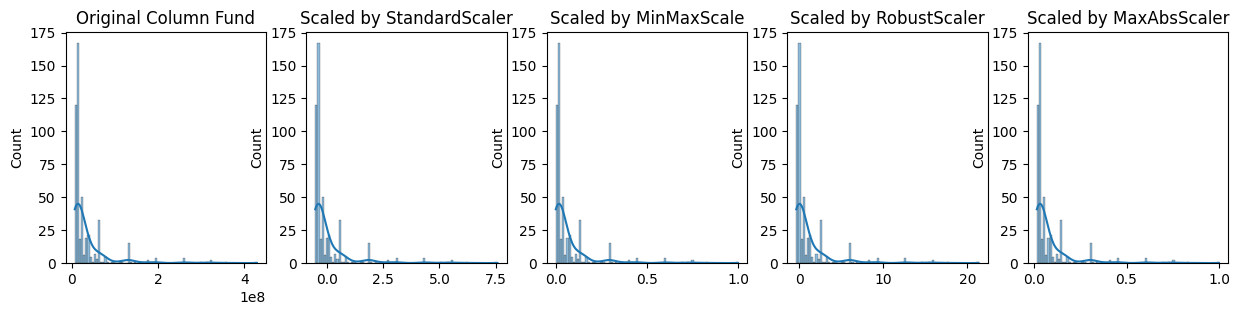

In [17]:
# Comparing the original column funds vs scaled column funds
fig, ax = plt.subplots(1, 5, figsize=(15, 3))
sns.histplot(col_funds, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Column Fund")
sns.histplot(Standard, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled by StandardScaler")
sns.histplot(MinMax, ax=ax[2], kde=True, legend=False)
ax[2].set_title("Scaled by MinMaxScale")
sns.histplot(Robust, ax=ax[3], kde=True, legend=False)
ax[3].set_title("Scaled by RobustScaler")
sns.histplot(MaxAbs, ax=ax[4], kde=True, legend=False)
ax[4].set_title("Scaled by MaxAbsScaler")

plt.show()

In [18]:
df['funds_in_rupiah'] = MaxAbs
df.head()

,scholarship_program_name,promoter,funds_in_rupiah,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,...,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,Curry & C/O '22 Scholarship,Kimora Jane Curry,0.015152,0.0,3,0,2,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,Jared Ethan Trueba Memorial Scholarship,The Trueba Family,0.015152,0.0,3,0,2,0,0,0,...,1,1,0,0,0,0,0,0,0,3
2,Linda Hicks Memorial Scholarship,Calvin Hicks and Tanya Minor,0.030303,0.0,3,0,2,0,0,0,...,1,0,0,1,0,0,0,0,0,6
3,Nitro No-Essay Scholarship,Nitro College,0.060606,0.0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,5
4,Niche No-Essay Scholarship,Niche,0.060606,0.0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,5


If you need the lean dataframe, just running code below

In [ ]:
df.to_csv (r'/content/Clean dataset.csv', index=None)

In [19]:
df = df.iloc[:, 2:]
df.head()

,funds_in_rupiah,gpa,religion,gpa_status,identity,underrepresented_minority,volunteering,first_generation,parental_status,total_awardee,essay,SMP-SMA,SMA,Sarjana,SMP-SMA-Sarjana,SMA-Sarjana,Sarjana-Fresh Graduate,Fresh Graduate,SMP-SMA-Sarjana-Fresh Graduate,education_level
0,0.015152,0.0,3,0,2,0,0,0,3,0,1,0,1,0,0,0,0,0,0,1
1,0.015152,0.0,3,0,2,0,0,0,3,0,1,1,0,0,0,0,0,0,0,3
2,0.030303,0.0,3,0,2,0,0,0,3,0,1,0,0,1,0,0,0,0,0,6
3,0.060606,0.0,3,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,5
4,0.060606,0.0,3,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,5


In [21]:
from sklearn.model_selection import train_test_split

# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_ and y_.
trainingset, testingset = train_test_split(df, test_size=0.30, random_state=1)

print(f"Train dataframe shape : {trainingset.shape}")
print(f"Test dataframe shape : {testingset.shape}")

trainingset.to_csv (r'/content/trainset.csv', index=None)
testingset.to_csv (r'/content/testset.csv', index=None)

Train dataframe shape : (347, 20)
Test dataframe shape : (149, 20)


In [24]:
df.shape

(496, 20)

# 2. Build Model



In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
from sklearn.preprocessing import PolynomialFeatures

In [27]:
x_train = trainingset.iloc[:, :19]
y_train = trainingset.iloc[:, 19:]

x_test = testingset.iloc[:, :19]
y_test = testingset.iloc[:, 19:]

#This the dataframe that we will use for the model, but before splitting to training and testing
print(f"Total row and column for x_train : {x_train.shape}")
print(f"Total row and column for y_train : {y_train.shape}")
print(f"Total row and column for x_test : {x_test.shape}")
print(f"Total row and column for y_test : {y_test.shape}")

Total row and column for x_train : (347, 19)
Total row and column for y_train : (347, 1)
Total row and column for x_test : (149, 19)
Total row and column for y_test : (149, 1)


In [28]:
model = Sequential(
    [
        tf.keras.Input(shape=(19,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(8, activation='linear')
    ], name = "model"
)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 13,160
Trainable params: 13,160
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=10
)

Epoch 1/10
11/11 [==============================] - 1s 3ms/step - loss: 1.8942 - accuracy: 0.3170
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 1.7330 - accuracy: 0.4207
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 1.5714 - accuracy: 0.4899
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 1.3852 - accuracy: 0.6369
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 1.1551 - accuracy: 0.7233
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.8743 - accuracy: 0.9020
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 0.5840 - accuracy: 0.9856
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.9971
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2002 - accuracy: 0.9971
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9971


# Testing data

In [31]:
model.evaluate(x_test, y_test)

test = x_test.iloc[:1, :]
yhat = model.predict(test)
preds = yhat.argmax(axis=1)
print(preds)

1/1 [==============================] - 0s 114ms/step
[5]
